# PCA - Embeddings
## Embeddings as individuals

### Read df
- idx: Indice associato da BERT ad una specifica word

In [1]:
import pandas as pd

TARGET_DATASET = 'TwReyes2013'
df = pd.read_pickle("../reports/{}.pca/PCA_2D_transposed.pkl".format(TARGET_DATASET))
df

,principal component 1,principal component 2
0,14.825347,-14.084693
1,14.759362,20.956924
2,-10.623721,28.728853
3,-41.761694,1.038998
4,16.295120,-8.964039
...,...,...
3067,19.318340,0.128719
3068,-19.239799,3.052571
3069,10.164441,10.703972
3070,8.564088,6.064622


### Plot words

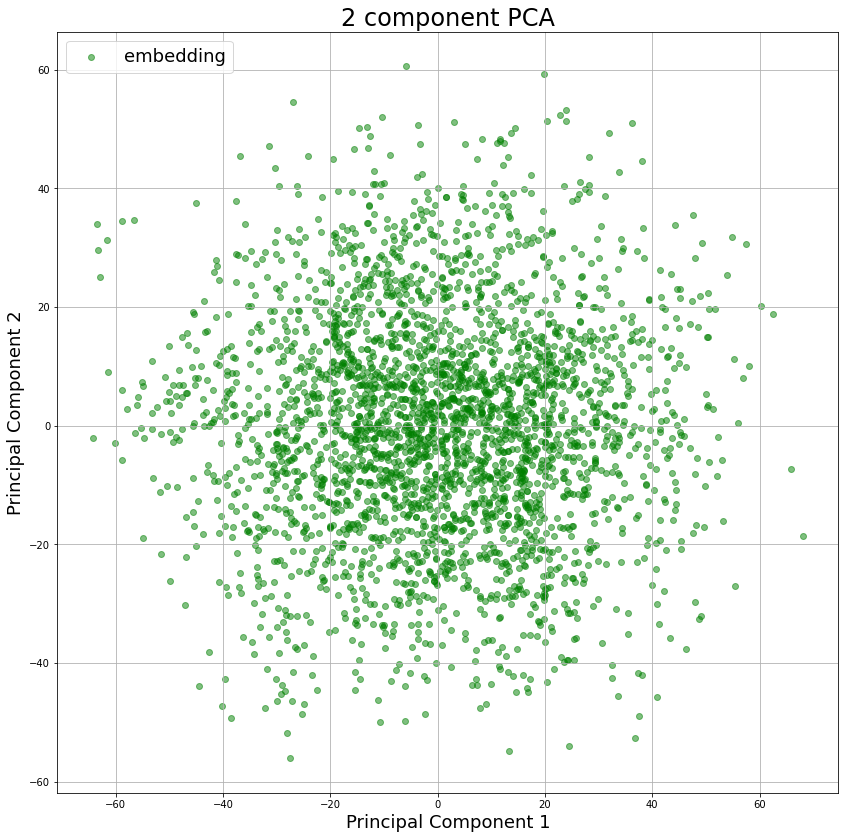

In [2]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 18)
ax.set_ylabel('Principal Component 2', fontsize = 18)
ax.set_title('2 component PCA', fontsize = 24)
# Plot words
ax.scatter(df["principal component 1"], df["principal component 2"], c='g', label='embedding', alpha=0.5)
ax.grid()
plt.legend(loc='upper left', fontsize = 18);